<a href="https://colab.research.google.com/github/DB11051998/gamereview-sentiment/blob/master/gamereview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive .mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#df_train.to_csv('/content/gdrive/My Drive/jantahack/NLP jantahack/cleaned.csv')


In [0]:
root_path='/content/gdrive/My Drive/jantahack/NLP jantahack'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
lis=[]
for dirname, _, filenames in os.walk(root_path):
    for filename in filenames:
        lis.append(os.path.join(dirname, filename))

In [5]:
lis

['/content/gdrive/My Drive/jantahack/NLP jantahack/test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/game_overview.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/test_BppAoe0.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/train_E52nqFa.zip',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/sample_submission_wgBqZCk.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/cleaned.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._test.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._train.csv',
 '/content/gdrive/My Drive/jantahack/NLP jantahack/__MACOSX/._game_overview.csv']

In [0]:
df_train=pd.read_csv(lis[1])

In [8]:
df_train.head(10)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [9]:
df_train.shape

(17494, 5)

In [10]:
df_train.isna().any()

review_id          False
title              False
year                True
user_review        False
user_suggestion    False
dtype: bool

In [11]:
df_train[df_train.year.isna()]['title'].unique()

array(['Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'theHunter Classic',
       'Eternal Card Game', 'Bless Online', 'RaceRoom Racing Experience',
       'Fallout Shelter', 'Tactical Monsters Rumble Arena', 'Creativerse',
       'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'AdventureQuest 3D', 'Realm Grinder', 'Bloons TD Battles',
       'Cuisine Royale', 'EverQuest II'], dtype=object)

In [12]:
df_train.user_suggestion.value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

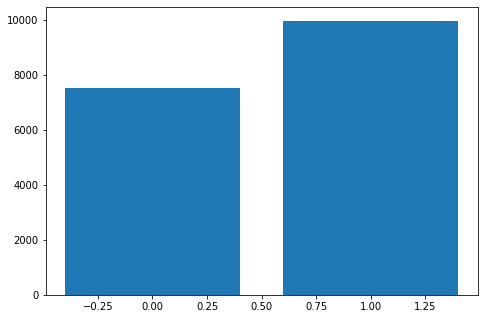

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_train.user_suggestion.unique(),df_train.user_suggestion.value_counts())
plt.show()

In [0]:
df_game_overview=pd.read_csv(lis[2])

In [15]:
len(df_train.title.unique())

44

In [16]:
df_train.user_review[8]

"Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your

In [17]:
#import library
import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from textblob import TextBlob
nltk.download('punkt')
#from spacy_langdetect import LanguageDetector
import spacy
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Other language present in the dataset**

In [0]:
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)
def spa_detect(df):
  doc = nlp(df)
  return(doc._.language['language'])


In [0]:
x=df_train.user_review.apply(spa_detect)

In [0]:
#df_train.user_review.apply(no_of_words)
df_train['language']=x

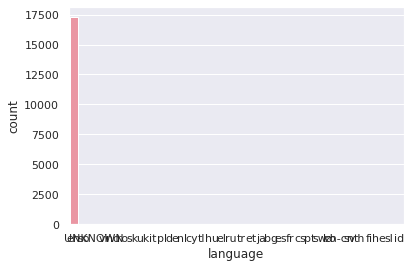

In [78]:
sns.set(style="darkgrid")
ax = sns.countplot(x="language", data=df_train)

In [91]:
df_train[df_train.language!='en'].index

Int64Index([], dtype='int64')

In [0]:
df_train.drop(index=df_train[df_train.language!='en'].index,axis=0,inplace=True)

In [0]:

df_tr_new=pd.read_csv(lis[6])

In [0]:
y=df_tr_new.user_review.apply(preprocess)

In [0]:
df_tr_new['Totalunigrams']=y

In [0]:
df_pos=df_tr_new[df_tr_new['user_suggestion']==1]['Totalunigrams']
df_neg=df_tr_new[df_tr_new['user_suggestion']==0]['Totalunigrams']

In [33]:
df_tr_new

,Unnamed: 0,review_id,title,year,user_review,user_suggestion,language,Totalunigrams
0,0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,en,67
1,1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,en,37
2,2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,en,38
3,3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,en,24
4,4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,en,34
...,...,...,...,...,...,...,...,...
17273,17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1,en,99
17274,17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1,en,132
17275,17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1,en,158
17276,17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1,en,22


Text(0, 0.5, 'Density')

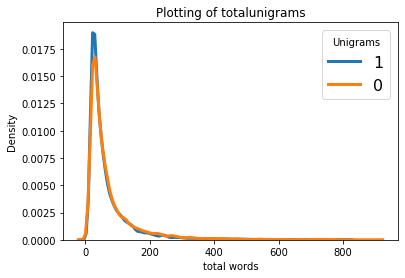

In [35]:

suggestions = [1,0]

for suggest in suggestions:
    subset = df_tr_new[df_tr_new['user_suggestion'] == suggest]
    
    sns.distplot(subset['Totalunigrams'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label =suggest)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Unigrams')
plt.title('Plotting of totalunigrams')
plt.xlabel('total words')
plt.ylabel('Density')

In [36]:
df_train.user_review.apply(bi_grm)

0        [(scared, hearing), (hearing, creepy), (creepy...
1        [(best, game), (game, better), (better, sam), ...
2        [(littly, iffy), (iffy, controls), (controls, ...
3        [(great, game), (game, fun), (fun, colorful), ...
4        [(many, games), (games, cute), (cute, tag), (t...
                               ...                        
17489    [(arguably, single), (single, greatest), (grea...
17490    [(older, game), (game, sure), (sure, charm), (...
17491    [(frist, started), (started, playing), (playin...
17492    [(cool, game), (game, thing), (thing, really),...
17493    [(game, since), (since, little), (little, kid)...
Name: user_review, Length: 17494, dtype: object

In [37]:
print(pos_tag(word_tokenize("This is beautiful")))

[('This', 'DT'), ('is', 'VBZ'), ('beautiful', 'JJ')]


In [0]:
##extract the pos tags

def POS_tag(df):
  ls=[]
  token_comment = df
  tagged_comment = pos_tag(token_comment)
  return([word for word, tag in tagged_comment if (tag=='JJ' or tag=='JJR' or tag=='JJS')])

In [0]:
z=y.apply(POS_tag)

In [0]:
m=z.apply(stemming)

In [0]:
s=nltk.FreqDist(m[0])

In [0]:
for i in range(1,17493):
  s+=nltk.FreqDist(m[i])

In [48]:
m

0        [scared, calm, adorable, happy, tree, sceme, b...
1                        [best, sam, pepper, extra, scary]
2        [iffy, easy, due, certain, unable, finish, bug...
3        [great, colorful, mode, fullscreen, enjoyable,...
4        [many, right, next, late, first, good, free, c...
                               ...                        
17273    [single, great, free, little, weak, extreme, b...
17274    [old, sure, special, young, want, right, certa...
17275    [everquest, great, friendly, mature, tough, up...
17276                      [cool, ridable, scenic, scenic]
17277                          [little, first, cool, edgy]
Name: user_review, Length: 17278, dtype: object

In [0]:
ls=[]
for i in range(len(z)):
  ls.append(z[i])

In [83]:
ls

['scared calm adorable happy tree sceme bubble clean isnot likable odd noob oh full dead shine flashlight hmm afraid',
 'best sam pepper extra scary',
 'iffy easy due certain unable finish bug casual fellow',
 'great colorful mode fullscreen enjoyable skyrim',
 'many right next late first good free close',
 'early cute jumpscare enjoyable worth great',
 'great cute little little watched several',
 'spooky free win ok ok wrong different try info free reviewshttp spooky',
 'light happy afraid spooky perspective key new tedium needless save save permanent foul clean low first adorable sound spine good foot deep dungeon intreege key different forever flashlight purple green slow limited vacant chasms open specific float good dead replenish big rare easy avoid specific dreadful tear quick deplete give door replenish limited good bright correct door torch black search adjacent hang good tense box video difficult easy long free suppose acceptable scary interesting mini good least best free go

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.6,min_df=0.0007)
feature=tfidf.fit_transform(ls)


In [0]:
t_feat=pd.DataFrame(feature.todense(),columns=tfidf.get_feature_names())

In [0]:
t_feat['labels']=df_tr_new['user_suggestion']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t_feat.drop(columns=['labels']), t_feat['labels'], test_size=0.33, random_state=42)

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred=gnb.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6599438793405823

In [0]:
####Very Bad score,we will work upon it

In [0]:
z=m.apply(listToString)

In [78]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
       

scared hearing creepy voices pause moment write review wait heart beat return atleast somewhat calmer times game adorable creepy like happy tree friends graphics sceme childhood bubble clean hello 1990 charactes isnot trying kill likable bit odd noob things though oh look class room full ghosts dead children lets shine flashlight stand staring hmm creepy music turn around see see chasing never game afraid finding locked door


In [80]:
z

0        scared calm adorable happy tree sceme bubble c...
1                              best sam pepper extra scary
2        iffy easy due certain unable finish bug casual...
3          great colorful mode fullscreen enjoyable skyrim
4               many right next late first good free close
                               ...                        
17273    single great free little weak extreme beautifu...
17274    old sure special young want right certain spee...
17275    everquest great friendly mature tough update d...
17276                           cool ridable scenic scenic
17277                               little first cool edgy
Name: user_review, Length: 17278, dtype: object

In [0]:
####free from other language which comprise about 216 out of 17916

In [0]:
def preprocess(df):
  #lowercase all characters
  #remove all symbols
  #tokenize the sentence to words
  x=re.sub(r'[^\w]', ' ', df)
  word_tokenize1=word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower())  
  #remove the stopwords
  filter1=[]
  for w in word_tokenize1: 
        if w not in stop_words: 
            filter1.append(w)

  filtered_full=np.array(filter1)

  return np.array(filtered_full)

In [0]:
def bi_grm(df):
  x=re.sub(r'[^\w]', ' ', df)
  word_tokenize1=word_tokenize(re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x).lower())
  filter1=[]
  for w in word_tokenize1: 
      if w not in stop_words: 
          filter1.append(w)

  filtered_full=np.array(filter1)
  bigrm = nltk.bigrams(filtered_full)
  return(list(bigrm))
 



In [0]:
y=df_train['user_review'].apply(preprocess)

In [91]:
y

0        [scared, hearing, creepy, voices, pause, momen...
1        [best, game, better, sam, pepper, youtube, acc...
2        [littly, iffy, controls, know, play, easy, mas...
3        [great, game, fun, colorful, side, note, thoug...
4        [many, games, cute, tag, right, next, horror, ...
                               ...                        
17489    [arguably, single, greatest, mmorp, exists, to...
17490    [older, game, sure, charm, holds, special, pla...
17491    [frist, started, playing, everquest, 2, amazin...
17492    [cool, game, thing, really, pisses, ridable, t...
17493    [game, since, little, kid, always, since, stil...
Name: user_review, Length: 17494, dtype: object

In [0]:
df_tokenize=pd.DataFrame(df_train,columns=['title'])

In [0]:
lemmatizer=WordNetLemmatizer()
print(lemmatizer.lemmatize('rooms')) 

room


In [0]:
df_tokenize['tokenized']=y

In [0]:
df_tokenize

,title,tokenized
0,Spooky's Jump Scare Mansion,"[scared, hearing, creepy, voices, pause, momen..."
1,Spooky's Jump Scare Mansion,"[best, game, better, sam, pepper, youtube, acc..."
2,Spooky's Jump Scare Mansion,"[littly, iffy, controls, know, play, easy, mas..."
3,Spooky's Jump Scare Mansion,"[great, game, fun, colorful, side, note, thoug..."
4,Spooky's Jump Scare Mansion,"[many, games, cute, tag, right, next, horror, ..."
...,...,...
17489,EverQuest II,"[arguably, single, greatest, mmorp, exists, to..."
17490,EverQuest II,"[older, game, sure, charm, holds, special, pla..."
17491,EverQuest II,"[frist, started, playing, everquest, 2, amazin..."
17492,EverQuest II,"[cool, game, thing, really, pisses, ridable, t..."


In [0]:
def stemming(df):
  ls=[]
  lemmatizer = WordNetLemmatizer()
  for w in df:
    ls.append(lemmatizer.lemmatize(w,pos="a"))
  filtered_full=np.array(ls)
  return np.array(filtered_full)

In [0]:
z=df_tokenize.tokenized.apply(stemming)

In [0]:
words,count=np.unique(z[8], return_counts=True)

In [0]:
dic={}
for i in range(len(words)):
  dic[words[i]]=count[i]

In [0]:
dic

{'350': 1,
 '3d': 1,
 '45': 1,
 'accept': 2,
 'accompani': 1,
 'across': 1,
 'act': 1,
 'adjac': 1,
 'ador': 1,
 'afraid': 1,
 'almost': 2,
 'alreadi': 1,
 'ambient': 1,
 'amount': 1,
 'anoth': 6,
 'anyth': 1,
 'area': 1,
 'asylum': 1,
 'avoid': 1,
 'away': 1,
 'balanc': 1,
 'begin': 1,
 'behind': 2,
 'best': 1,
 'beyond': 1,
 'big': 1,
 'black': 1,
 'box': 2,
 'break': 1,
 'bright': 1,
 'bring': 1,
 'budget': 1,
 'calm': 1,
 'cardboard': 3,
 'cartoon': 1,
 'catch': 1,
 'ceil': 1,
 'chanc': 1,
 'chang': 1,
 'charm': 2,
 'chase': 2,
 'chasm': 1,
 'cheap': 1,
 'chill': 1,
 'chime': 1,
 'chipper': 1,
 'clean': 1,
 'coat': 1,
 'coffe': 1,
 'combin': 1,
 'come': 1,
 'comput': 1,
 'corner': 1,
 'correct': 1,
 'corridor': 2,
 'could': 1,
 'count': 1,
 'creatur': 3,
 'crescendo': 1,
 'cutout': 3,
 'dank': 1,
 'dark': 3,
 'darker': 1,
 'daunt': 1,
 'dead': 1,
 'death': 1,
 'deeper': 1,
 'delv': 1,
 'depart': 1,
 'deplet': 1,
 'differ': 1,
 'difficult': 1,
 'divers': 2,
 'door': 5,
 'dread': 3,


In [0]:
print(df_train.iloc[8].user_review)

Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your 

other way approach

In [0]:
from textblob import TextBlob

In [0]:
df_pos=df_train[df_train['user_suggestion']==1]['user_review']
df_neg=df_train[df_train['user_suggestion']==0]['user_review']

In [42]:
TextBlob("  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.").sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

In [27]:
df_pos[0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [0]:
def sent_tok(df):
  return(sent_tokenize(df))

In [0]:
y=df_pos.apply(sent_tok)

In [29]:
nltk.download('punkt')
from tqdm import tqdm_notebook as tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
'''def sent_ana(df):
  length=len(df)
  sent_pol=0
  sent_sub=0
  for x in tqdm(df):
    sent_pol+=TextBlob(x).sentiment.polarity
    sent_sub+=TextBlob(x).sentiment.subjectivity
  sent_pol=sent_pol/length
  sent_sub=sent_sub/length
  return(sent_pol,sent_sub)'''


'def sent_ana(df):\n  length=len(df)\n  sent_pol=0\n  sent_sub=0\n  for x in tqdm(df):\n    sent_pol+=TextBlob(x).sentiment.polarity\n    sent_sub+=TextBlob(x).sentiment.subjectivity\n  sent_pol=sent_pol/length\n  sent_sub=sent_sub/length\n  return(sent_pol,sent_sub)'

In [46]:
df_pos

0        I'm scared and hearing creepy voices.  So I'll...
1        Best game, more better than Sam Pepper's YouTu...
2        A littly iffy on the controls, but once you kn...
3        Great game, fun and colorful and all that.A si...
4        Not many games have the cute tag right next to...
                               ...                        
17489    Arguably the single greatest mmorp that exists...
17490    An older game, to be sure, but has its own cha...
17491    When I frist started playing Everquest 2 it wa...
17492    cool game. THe only thing that REALLY PISSES M...
17493    this game since I was a little kid, always hav...
Name: user_review, Length: 9968, dtype: object

In [0]:
def sent_ana(df):
  sentiment=TextBlob(df).sentiment.polarity
  return(sentiment)


In [0]:
## from the above method we found the wrong analysis

In [0]:
y=df_pos.apply(preprocess)

In [62]:
z=y.apply(stemming)
z

0        [scare, hear, creepi, voic, paus, moment, writ...
1        [best, game, better, sam, pepper, youtub, acco...
2        [littli, iffi, control, know, play, easi, mast...
3        [great, game, fun, color, side, note, though, ...
4        [mani, game, cute, tag, right, next, horror, t...
                               ...                        
17489    [arguabl, singl, greatest, mmorp, exist, today...
17490    [older, game, sure, charm, hold, special, plac...
17491    [frist, start, play, everquest, 2, amaz, still...
17492    [cool, game, thing, realli, piss, ridabl, tran...
17493    [game, sinc, littl, kid, alway, sinc, still, r...
Name: user_review, Length: 9968, dtype: object

array(['scare', 'hear', 'creepi', 'voic', 'paus', 'moment', 'write',
       'review', 'wait', 'heart', 'beat', 'return', 'atleast', 'somewhat',
       'calmer', 'time', 'game', 'ador', 'creepi', 'like', 'happi',
       'tree', 'friend', 'graphic', 'sceme', 'childhood', 'bubbl',
       'clean', 'hello', '1990', 'charact', 'isnot', 'tri', 'kill',
       'likabl', 'bit', 'odd', 'noob', 'thing', 'though', 'oh', 'look',
       'class', 'room', 'full', 'ghost', 'dead', 'children', 'let',
       'shine', 'flashlight', 'stand', 'stare', 'hmm', 'creepi', 'music',
       'turn', 'around', 'see', 'see', 'chase', 'never', 'game', 'afraid',
       'find', 'lock', 'door'], dtype='<U10')

N-Gram

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(stop_words='english',analyzer=stemmed_words)
print(stem_vectorizer.fit_transform(df_pos))
print(stem_vectorizer.get_feature_names())

  (0, 21252)	1
  (0, 2382)	7
  (0, 11738)	1
  (0, 6256)	3
  (0, 26140)	1
  (0, 22370)	1
  (0, 14375)	2
  (0, 17668)	1
  (0, 9754)	2
  (0, 15785)	1
  (0, 26981)	1
  (0, 20150)	1
  (0, 26596)	1
  (0, 26260)	1
  (0, 16134)	4
  (0, 11742)	1
  (0, 3558)	1
  (0, 24592)	3
  (0, 20128)	1
  (0, 2967)	1
  (0, 22472)	1
  (0, 4619)	1
  (0, 24500)	1
  (0, 24295)	2
  (0, 10324)	2
  :	:
  (9967, 9559)	1
  (9967, 3240)	1
  (9967, 22014)	2
  (9967, 23119)	1
  (9967, 14357)	1
  (9967, 24664)	1
  (9967, 24374)	1
  (9967, 26713)	1
  (9967, 2257)	1
  (9967, 16189)	1
  (9967, 21447)	1
  (9967, 16645)	1
  (9967, 8765)	1
  (9967, 13684)	1
  (9967, 23565)	1
  (9967, 14244)	1
  (9967, 2526)	1
  (9967, 5994)	1
  (9967, 27151)	2
  (9967, 6660)	1
  (9967, 14444)	1
  (9967, 19914)	1
  (9967, 14385)	1
  (9967, 8123)	1
  (9967, 27400)	1


In [70]:
''' after stemming i got to know it has characters from other languages
    task:-remove the numbers and noises present(like:-aaaaa,aaaaaas,ssss)
          check no of doc of other languages(checked)
          properly stemming
          form the feature vectors depending upon the maxm use of words(frquency/count based)'''
      

' after stemming i got to know it has characters from other languages\n    task:-remove the numbers and noises present(like:-aaaaa,aaaaaas,ssss)\n          check no of doc of other languages\n          properly stemming\n          form the feature vectors depending upon the maxm use of words(frquency/count based)'